In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

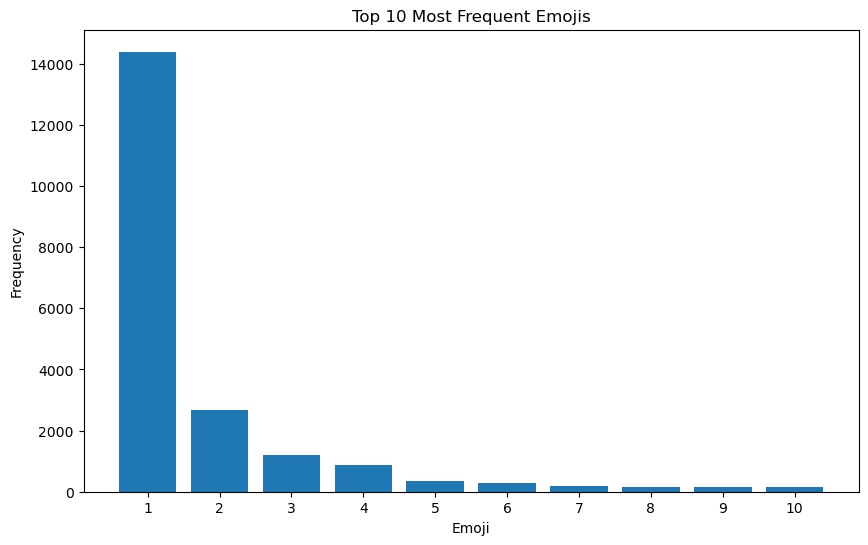

Emoji Label Mapping:
1: 👉
2: 👉👈
3: 👉👉
4: 😍😍
5: 🔥
6: 👇
7: 📢
8: 😍
9: 📈
10: 🚀


In [4]:
report_df=pd.read_csv('./processed_backhand_index_pointing_right.csv',on_bad_lines='skip')

#Analyzing the Frequency of the Emoji used
emoji_series = report_df['emojis'].dropna()
emoji_list = [emoji for emojis in emoji_series for emoji in str(emojis).split()]
emoji_counts = Counter(emoji_list)
top_emojis = emoji_counts.most_common(10)
emojis, counts = zip(*top_emojis)

emoji_labels = list(range(1, len(emojis) + 1))

plt.figure(figsize=(10,6))
plt.bar(emoji_labels, counts)
plt.title('Top 10 Most Frequent Emojis')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.xticks(emoji_labels)
plt.show()

print("Emoji Label Mapping:")
for label, emoji in zip(emoji_labels, emojis):
    print(f"{label}: {emoji}")

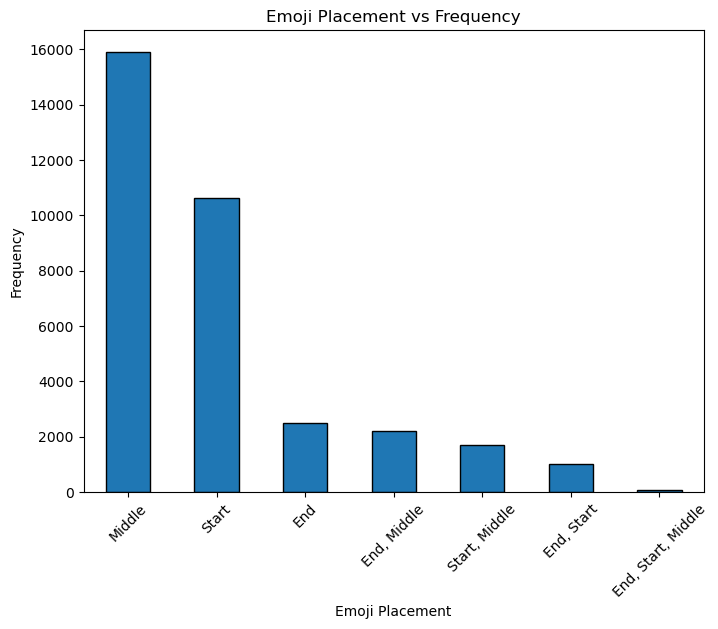

In [5]:
#Analyzing the Placement of Emojis
placement_sentiment = report_df.groupby('placement')['sentiment_difference'].mean().sort_values()

placement_counts = report_df['placement'].value_counts()
plt.figure(figsize=(8,6))
placement_counts.plot(kind='bar', edgecolor='black')
plt.title('Emoji Placement vs Frequency')
plt.xlabel('Emoji Placement')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

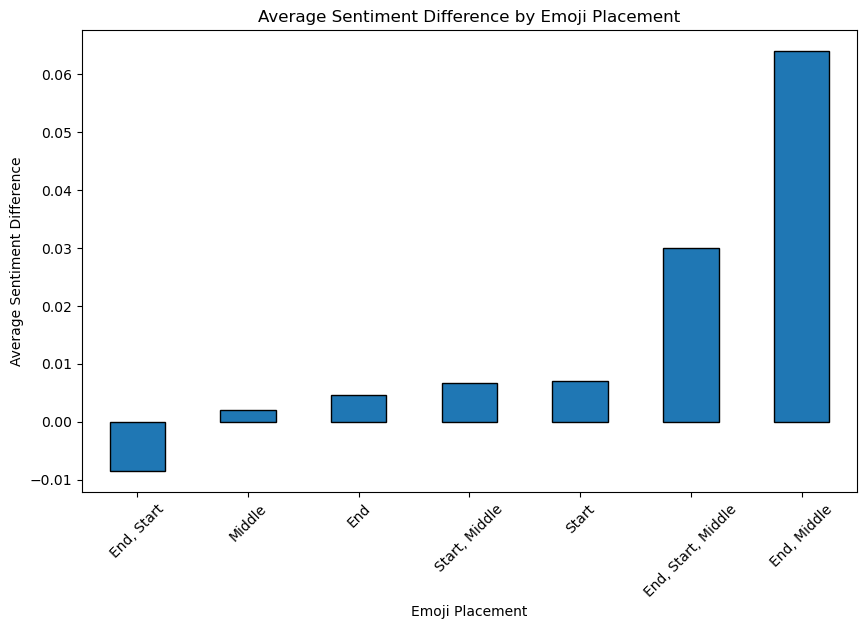

In [6]:
#Analyzing the difference in sentiment before and after the addition of emojis into the text
placement_sentiment = report_df.groupby('placement')['sentiment_difference'].mean().sort_values()

plt.figure(figsize=(10,6))
placement_sentiment.plot(kind='bar', edgecolor='black')
plt.title('Average Sentiment Difference by Emoji Placement')
plt.xlabel('Emoji Placement')
plt.ylabel('Average Sentiment Difference')
plt.xticks(rotation=45)
plt.show()

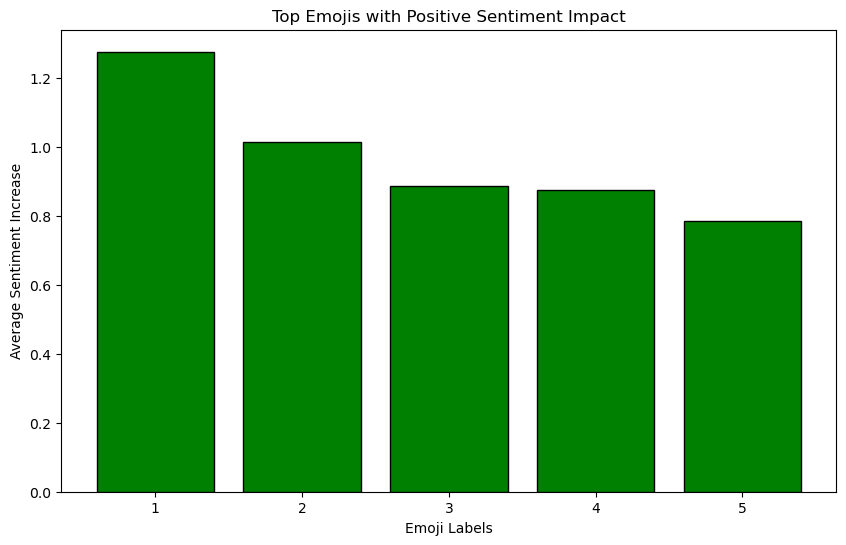

Positive Sentiment Emoji Mapping:
1: 👅🐇🐇🐇🌾🐇👌👌👅👄👄🐇💃🏼💃🏼👆🏾👇🏾👆🏾👇🏾👆🏾👇🏾🍑🍑👉👌👄👅🐇
2: 😈😈👉👉👉
3: 👌👉🙏
4: 💕🐶
5: 👄😸


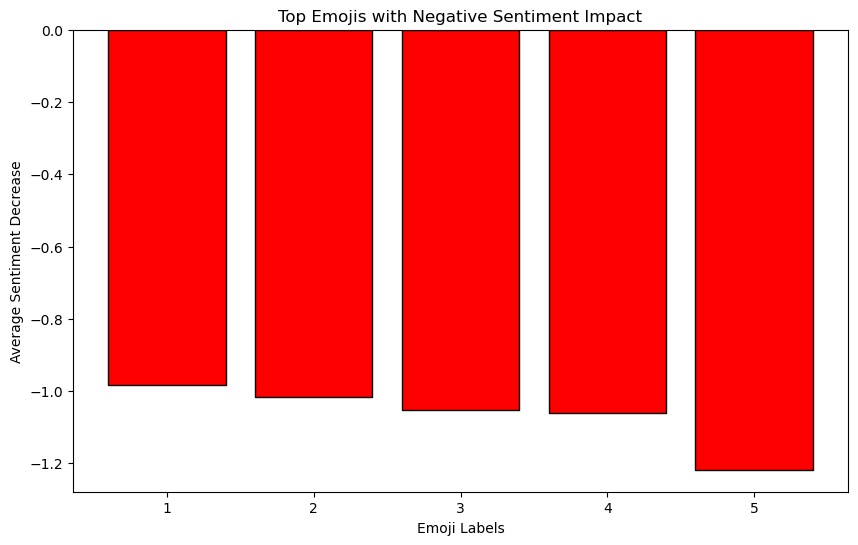


Negative Sentiment Emoji Mapping:
1: 🎁🔥🔥🔥
2: 🎬👀🚀💥🔥👉
3: 👉👈👀😭😭😭🙉
4: 🔥👻😱👉🎁
5: 👆👉💯🔥👆🔥🔥🔥


In [8]:
import matplotlib.pyplot as plt

def analyze_sentiment_impact(df, top_n=5):
    emoji_sentiment = {}

    # Calculate sentiment differences for each emoji
    for _, row in df.dropna(subset=['emojis']).iterrows():
        emojis = str(row['emojis']).split()
        sentiment_diff = row['sentiment_difference']
        for emoji in emojis:
            if emoji not in emoji_sentiment:
                emoji_sentiment[emoji] = []
            emoji_sentiment[emoji].append(sentiment_diff)

    # Compute average sentiment impact
    avg_sentiment_impact = {emoji: sum(scores)/len(scores) for emoji, scores in emoji_sentiment.items()}

    # Sort emojis based on sentiment impact
    sorted_emojis = sorted(avg_sentiment_impact.items(), key=lambda x: x[1], reverse=True)
    top_positive = sorted_emojis[:top_n]
    top_negative = sorted_emojis[-top_n:]

    # Plot sentiment impact
    plot_sentiment_impact(top_positive, top_negative)

def plot_sentiment_impact(top_positive, top_negative):
    # Positive Sentiment Impact
    pos_emojis, pos_scores = zip(*top_positive)
    pos_labels = list(range(1, len(pos_emojis) + 1))

    plt.figure(figsize=(10,6))
    plt.bar(pos_labels, pos_scores, color='green', edgecolor='black')
    plt.title('Top Emojis with Positive Sentiment Impact')
    plt.xlabel('Emoji Labels')
    plt.ylabel('Average Sentiment Increase')
    plt.xticks(pos_labels)  # Ensure all labels are displayed
    plt.show()

    print("Positive Sentiment Emoji Mapping:")
    for label, emoji in zip(pos_labels, pos_emojis):
        print(f"{label}: {emoji}")

    # Negative Sentiment Impact
    neg_emojis, neg_scores = zip(*top_negative)
    neg_labels = list(range(1, len(neg_emojis) + 1))

    plt.figure(figsize=(10,6))
    plt.bar(neg_labels, neg_scores, color='red', edgecolor='black')
    plt.title('Top Emojis with Negative Sentiment Impact')
    plt.xlabel('Emoji Labels')
    plt.ylabel('Average Sentiment Decrease')
    plt.xticks(neg_labels)  # Ensure all labels are displayed
    plt.show()

    print("\nNegative Sentiment Emoji Mapping:")
    for label, emoji in zip(neg_labels, neg_emojis):
        print(f"{label}: {emoji}")

# Example usage:
analyze_sentiment_impact(report_df)

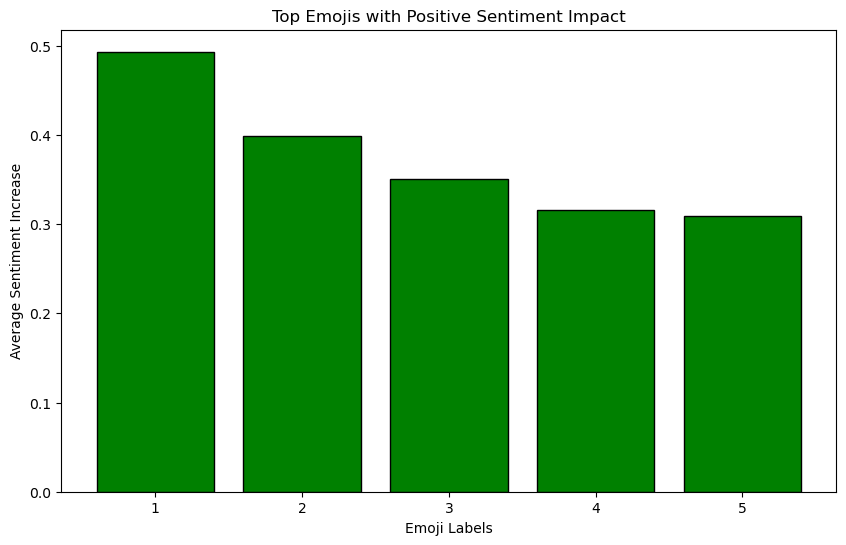

Positive Sentiment Emoji Mapping:
1: 🏾 | Code: U+1F3FE
2: 🙋 | Code: U+1F64B
3: 🔷 | Code: U+1F537
4: 🍑 | Code: U+1F351
5: 🍩 | Code: U+1F369


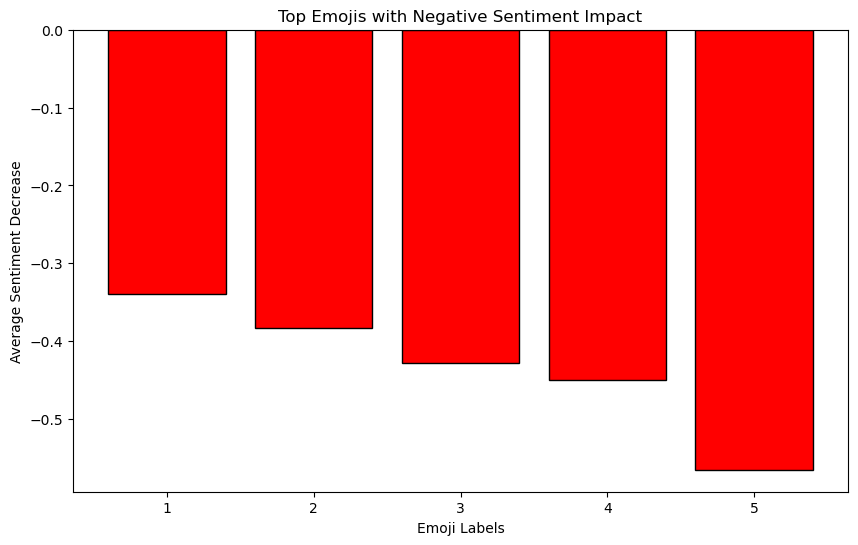


Negative Sentiment Emoji Mapping:
1: 🚓
2: 🍂
3: 🙅
4: 🖇
5: 👵


In [13]:
def get_emoji_code(emoji_char):
    return ' '.join(f'U+{ord(char):04X}' for char in emoji_char)
    
def analyze_sentiment_impact(df, top_n=5):
    emoji_sentiment = {}

    for _, row in df.dropna(subset=['emojis']).iterrows():
        emojis = list(str(row['emojis']))
        sentiment_diff = row['sentiment_difference']

        for emoji in emojis:
            if emoji.strip():
                if emoji not in emoji_sentiment:
                    emoji_sentiment[emoji] = []
                emoji_sentiment[emoji].append(sentiment_diff)

    avg_sentiment_impact = {emoji: sum(scores)/len(scores) for emoji, scores in emoji_sentiment.items()}

    sorted_emojis = sorted(avg_sentiment_impact.items(), key=lambda x: x[1], reverse=True)
    top_positive = sorted_emojis[:top_n]
    top_negative = sorted_emojis[-top_n:]

    plot_sentiment_impact(top_positive, top_negative)

def plot_sentiment_impact(top_positive, top_negative):
    pos_emojis, pos_scores = zip(*top_positive)
    pos_labels = list(range(1, len(pos_emojis) + 1))

    plt.figure(figsize=(10,6))
    plt.bar(pos_labels, pos_scores, color='green', edgecolor='black')
    plt.title('Top Emojis with Positive Sentiment Impact')
    plt.xlabel('Emoji Labels')
    plt.ylabel('Average Sentiment Increase')
    plt.xticks(pos_labels)
    plt.show()

    print("Positive Sentiment Emoji Mapping:")
    for label, emoji in zip(pos_labels, pos_emojis):
        print(f"{label}: {emoji} | Code: {get_emoji_code(emoji)}")

    neg_emojis, neg_scores = zip(*top_negative)
    neg_labels = list(range(1, len(neg_emojis) + 1))

    plt.figure(figsize=(10,6))
    plt.bar(neg_labels, neg_scores, color='red', edgecolor='black')
    plt.title('Top Emojis with Negative Sentiment Impact')
    plt.xlabel('Emoji Labels')
    plt.ylabel('Average Sentiment Decrease')
    plt.xticks(neg_labels)
    plt.show()

    print("\nNegative Sentiment Emoji Mapping:")
    for label, emoji in zip(neg_labels, neg_emojis):
        print(f"{label}: {emoji}")

analyze_sentiment_impact(report_df)

In [ ]:
# 🏾 | Code: U+1F3FE